In [5]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter

In [6]:
df = pd.read_csv("output_iphone_Total.csv")
df['review'][1]
df

Unnamed: 0  Unnamed: 0.1     type category  \
0              0             1  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1              1             2  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
2              2             3  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
3              3             4  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
4              4             5  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
...          ...           ...      ...      ...   
1744        1744          1745  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1745        1745          1746  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1746        1746          1747  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1747        1747          1748  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1748        1748          1749  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   

                                                 review star  
0     ÏïÑÏù¥Ìè∞ÏùÑ ÏÇ¨Í≥† Î∞∞ÏÜ°Î∞õÏùÄ Îí§ Î©∞Ïπ† ÏÇ¨Ïö©Ìï¥Î≥∏ ÌõÑÏóê Î¶¨Î∑∞ ÏûëÏÑ±ÌïòÍ≥† Ïã∂Ïñ¥ÏÑú Ïù¥Ï†úÏÑúÏïº ÌõÑÍ∏∞Î•º...  ÌèâÏ†ê5  
1     Í∏∞Î≥Ä ÏòàÏïΩÏùÑ ÌïòÍ≥† ÎåÄÍ∏∞ÌÉÄÎã§Í∞Ä Ïö∞Ïó∞Ìûà ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÎÇ† Î∞§Ïóê Ïù¥ Í≥≥ÏùÑ ÏïåÍ≤åÎêòÏñ¥ ÏÖÄÌîÑ ÏÑ†Î¨ºÎ°ú...  ÌèâÏ†ê5  
2     Ïûò ÌÑ∞ÏßÄÏßÄÎèÑ ÏïäÍ≥† ÏöîÍ∏àÎßå ÎπÑÏãº 5GÎ•º ÏïΩÏ†ïÍ±∏Ïñ¥Í∞ÄÎ©∞ Íµ≥Ïù¥ Ïì∞Í≥†Ïã∂ÏßÄÎäî ÏïäÏïÑÏÑú ÏûêÍ∏âÏ†ú Ìè∞...  ÌèâÏ†ê5  
3     ÎåÄÎ¶¨Ï†êÏóê ÏòàÏïΩÏùÑ Ìï¥ÎÜìÍ≥† Ìïú Îã¨ÏùÑ Ï°±Ìûà Í∏∞Îã§Î†∏ÎäîÎç∞ Î∞õÏßÄ Î™ªÌñàÏäµÎãàÎã§. Ïø†Ìå°ÏùÄ Î∞îÎ°úÎ∞îÎ°ú ...  ÌèâÏ†ê5  
4     ÏïÑÏù¥Ìè∞ ÌîÑÎ°ú 12 Ïã§Î≤Ñ Íµ¨Îß§Ïûê ÏûÖÎãàÎã§^^Í∏∞Îã§Î¶¨Í≥† Í∏∞Îã§Î¶¨Îçò Ï†úÌíàÏùÑ Îπ†Î•¥Í≤å Î∞õÏïÑ Î≥º Ïàò...  ÌèâÏ†ê5  
...                                                 ...  ...  
1744  ÏõêÎûò 11Ïõî ÎëòÏß∏Ï£º Î∞∞ÏÜ°ÏòàÏ†ïÏù¥ÏóàÎäî\nÏõêÎûò 11Ïõî ÎëòÏß∏Ï£º Î∞∞ÏÜ°ÏòàÏ†ïÏù¥ÏóàÎäîÎç∞ Ïñ¥Ï†ú Î∞õÏïòÏñ¥...  ÌèâÏ†ê5  
1745  ÎÑàÎ¨¥Ïù¥ÏÅúÍ±∞ ÏïÑÎãåÍ∞ÄÏöî „Ö†„Ö†„Ö†„Ö†„Ö†\nÎÑàÎ¨¥Ïù¥ÏÅúÍ±∞ ÏïÑÎãåÍ∞ÄÏöî „Ö†„Ö†„Ö†„Ö†„Ö†„Ö†\nÏßÑÏßú ÏïûÏúºÎ°ú ÏûòÎ∂Ä...  ÌèâÏ†ê5  
1746                             Ï¢ãÏïÑÏöî ÏïÑÏ£º Ï¢ãÏïÑÏöî\nÏ¢ãÏïÑÏöî ÏïÑÏ£º Ï¢ãÏïÑÏöî  ÌèâÏ†ê5  
1747                           ÎßåÏ°±Ìï©ÎãàÎã§ ÎßåÏ°±Ìï©ÎãàÎã§\nÎßåÏ°±Ìï©ÎãàÎã§ ÎßåÏ°±Ìï©ÎãàÎã§  ÌèâÏ†ê5  
1748  Ï¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöî\nÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑ...  ÌèâÏ†ê5  

[1749 rows x 6 columns]

In [7]:
#review
text=''
review=[]
for each_line in df['review']:
    review.append(each_line)
    
review[1]

'Í∏∞Î≥Ä ÏòàÏïΩÏùÑ ÌïòÍ≥† ÎåÄÍ∏∞ÌÉÄÎã§Í∞Ä Ïö∞Ïó∞Ìûà ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÎÇ† Î∞§Ïóê Ïù¥ Í≥≥ÏùÑ ÏïåÍ≤åÎêòÏñ¥ ÏÖÄÌîÑ ÏÑ†Î¨ºÎ°ú Î∞îÎ°ú Ï£ºÎ¨∏, Í≤∞Ï†úÌñàÏäµÎãàÎã§! ÏûêÍ∏âÏ†úÎäî Ï≤òÏùåÏù¥Îùº ÏÑ§Î†àÎäî Í∏¥Ïû•ÏúºÎ°ú Í∏∞Îã§Î†∏Îçò Í∏∞ÏñµÏù¥ ÏÉàÎ°ùÏÉàÎ°ùÌïòÎÑ§Ïöî!!Ìú¥\nÍ∏∞Î≥Ä ÏòàÏïΩÏùÑ ÌïòÍ≥† ÎåÄÍ∏∞ÌÉÄÎã§Í∞Ä Ïö∞Ïó∞Ìûà ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÎÇ† Î∞§Ïóê Ïù¥ Í≥≥ÏùÑ ÏïåÍ≤åÎêòÏñ¥ ÏÖÄÌîÑ ÏÑ†Î¨ºÎ°ú Î∞îÎ°ú Ï£ºÎ¨∏, Í≤∞Ï†úÌñàÏäµÎãàÎã§! ÏûêÍ∏âÏ†úÎäî Ï≤òÏùåÏù¥Îùº ÏÑ§Î†àÎäî Í∏¥Ïû•ÏúºÎ°ú Í∏∞Îã§Î†∏Îçò Í∏∞ÏñµÏù¥ ÏÉàÎ°ùÏÉàÎ°ùÌïòÎÑ§Ïöî!!\n\nÌú¥ÏùºÍ≥º Ï£ºÎßê Ìè¨Ìï® 25Ïùº Í≤∞Ï†ú, 30Ïùº ÏàòÎ†πÌñàÏäµÎãàÎã§. Î∞õÍ≥† Î≥¥Îãà Î¨¥ÏóáÎ≥¥Îã§ ÎÑ§Ïù¥Î≤ÑÌéòÏù¥Î°ú Îã§Î•∏ ÏûêÍ∏âÏ†úÎ≥¥Îã§ ÌòúÌÉùÏù¥ ÌÅ∞ Í±∞ Í∞ôÏïÑÏöî:)\n\nü§≥üèªÏÇ¨Ïö©Í∞ê\n6sÏóêÏÑú ÎÑòÏñ¥ÏôîÎäîÎç∞ Î™®Îì† Í≤å Îã§ ÏÉàÎ°≠Í∏¥ ÌïòÏßÄÎßå ÌôïÏã§Ìûà Îû®Ïù¥ ÎäòÏñ¥ÎÇòÏÑú Îπ†Î¶øÎπ†Î¶øÌïúÍ≤å ÏßúÎ¶øÌï©ÎãàÎã§... ÏïÑÏù¥Ìè∞ Ïì∞Ïã† Î∂ÑÎì§ÏùÄ ÏïÑÏãúÍ≤†ÏßÄÎßå Ï∞Ω ÎÑòÍ∏∏ Îïå Î∂ÄÎìúÎü¨Ïö¥ Í±∞ Î™ª ÏûÉÎäîÎç∞ ÏÜçÎèÑÎèÑ Îπ†Î•¥Í≥†\n\nü§≥üèªÏª¨Îü¨\nÏ≤òÏùåÎ∂ÄÌÑ∞ ÌçºÏãúÌîΩÎ∏îÎ£®Í∞Ä ÏõêÌîΩÏù¥ÏóàÎäîÎç∞ Í≥†Î

In [8]:
#Î∂àÏö©Ïñ¥ Ï†úÍ±∞
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mailÏ†úÍ±∞
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URLÏ†úÍ±∞
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([„Ñ±-„Öé„Öè-„Ö£]+)'  # ÌïúÍ∏Ä ÏûêÏùå, Î™®Ïùå Ï†úÍ±∞
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML ÌÉúÍ∑∏ Ï†úÍ±∞
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # ÌäπÏàòÍ∏∞Ìò∏Ï†úÍ±∞
    text = re.sub(pattern=pattern, repl='', string=text)
    hangul = re.compile('[^ „Ñ±-„Ö£ Í∞Ä-Ìû£]')
    result = hangul.sub('',text)
    return text   

review_=[]
for i in review:
    a=clean_str(i)
    review_.append(a)  #Î∂àÏö©Ïñ¥Ï†úÍ±∞Ìïú review Ï†ÄÏû•
    
review_[1]

'Í∏∞Î≥Ä ÏòàÏïΩÏùÑ ÌïòÍ≥† ÎåÄÍ∏∞ÌÉÄÎã§Í∞Ä Ïö∞Ïó∞Ìûà ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÎÇ† Î∞§Ïóê Ïù¥ Í≥≥ÏùÑ ÏïåÍ≤åÎêòÏñ¥ ÏÖÄÌîÑ ÏÑ†Î¨ºÎ°ú Î∞îÎ°ú Ï£ºÎ¨∏ Í≤∞Ï†úÌñàÏäµÎãàÎã§ ÏûêÍ∏âÏ†úÎäî Ï≤òÏùåÏù¥Îùº ÏÑ§Î†àÎäî Í∏¥Ïû•ÏúºÎ°ú Í∏∞Îã§Î†∏Îçò Í∏∞ÏñµÏù¥ ÏÉàÎ°ùÏÉàÎ°ùÌïòÎÑ§ÏöîÌú¥\nÍ∏∞Î≥Ä ÏòàÏïΩÏùÑ ÌïòÍ≥† ÎåÄÍ∏∞ÌÉÄÎã§Í∞Ä Ïö∞Ïó∞Ìûà ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÎÇ† Î∞§Ïóê Ïù¥ Í≥≥ÏùÑ ÏïåÍ≤åÎêòÏñ¥ ÏÖÄÌîÑ ÏÑ†Î¨ºÎ°ú Î∞îÎ°ú Ï£ºÎ¨∏ Í≤∞Ï†úÌñàÏäµÎãàÎã§ ÏûêÍ∏âÏ†úÎäî Ï≤òÏùåÏù¥Îùº ÏÑ§Î†àÎäî Í∏¥Ïû•ÏúºÎ°ú Í∏∞Îã§Î†∏Îçò Í∏∞ÏñµÏù¥ ÏÉàÎ°ùÏÉàÎ°ùÌïòÎÑ§Ïöî\n\nÌú¥ÏùºÍ≥º Ï£ºÎßê Ìè¨Ìï® 25Ïùº Í≤∞Ï†ú 30Ïùº ÏàòÎ†πÌñàÏäµÎãàÎã§ Î∞õÍ≥† Î≥¥Îãà Î¨¥ÏóáÎ≥¥Îã§ ÎÑ§Ïù¥Î≤ÑÌéòÏù¥Î°ú Îã§Î•∏ ÏûêÍ∏âÏ†úÎ≥¥Îã§ ÌòúÌÉùÏù¥ ÌÅ∞ Í±∞ Í∞ôÏïÑÏöî\n\nÏÇ¨Ïö©Í∞ê\n6sÏóêÏÑú ÎÑòÏñ¥ÏôîÎäîÎç∞ Î™®Îì† Í≤å Îã§ ÏÉàÎ°≠Í∏¥ ÌïòÏßÄÎßå ÌôïÏã§Ìûà Îû®Ïù¥ ÎäòÏñ¥ÎÇòÏÑú Îπ†Î¶øÎπ†Î¶øÌïúÍ≤å ÏßúÎ¶øÌï©ÎãàÎã§ ÏïÑÏù¥Ìè∞ Ïì∞Ïã† Î∂ÑÎì§ÏùÄ ÏïÑÏãúÍ≤†ÏßÄÎßå Ï∞Ω ÎÑòÍ∏∏ Îïå Î∂ÄÎìúÎü¨Ïö¥ Í±∞ Î™ª ÏûÉÎäîÎç∞ ÏÜçÎèÑÎèÑ Îπ†Î•¥Í≥†\n\nÏª¨Îü¨\nÏ≤òÏùåÎ∂ÄÌÑ∞ ÌçºÏãúÌîΩÎ∏îÎ£®Í∞Ä ÏõêÌîΩÏù¥ÏóàÎäîÎç∞ Í≥†ÎØº ÎÅùÏóê ÎùºÏä§Ìä∏ÌîΩÎèÑ ÌçºÎ∏

In [9]:
import tweepy
# !pip install tweepy==3.10.0
# !pip install konlpy
from konlpy.tag import Okt
t = Okt()

a= len(review_) #Î∂àÏö©Ïñ¥ Ï†úÍ±∞Ìïú Î¶¨Î∑∞
token_review_list=[]
for i in range(0,a): # Î¶¨Î∑∞ÌïòÎÇòÎãπ Ï≤òÎ¶¨ÌïòÍ∏∞ÏúÑÌï¥ forÎ¨∏ 
    token_review=t.morphs(review_[i])  #t=ÌòïÌÉúÏÜåÎ∂ÑÏÑùÍ∏∞. morphs=ÌòïÌÉúÏÜå Ï∂îÏ∂ú.review_=Ï†ÑÏ≤òÎ¶¨Ìïú Î¶¨Î∑∞.
    #token_review_str=(' '.join(token_review))  #,Î°ú ÎÇòÎàÑÏñ¥Ï†∏ÏûàÎäî ÌòïÌÉúÏÜåÎ•º ÌïòÎÇòÏùò strÎ°ú Î¨∂Í∏∞(dfÏóê ÎÑ£Í∏∞ÏúÑÌï¥ÏÑú)
    #df['token_reivew'] = token_review_str  #Ïù¥Î†áÍ≤åÌïòÎ©¥ Ïó¥Ï†ÑÏ≤¥Í∞íÏù¥ ÌÜµÏùºÎê®
    token_review_list.append(token_review) #ÌïòÎÇòÏùò Î¶¨Ïä§Ìä∏Î•º ÎßåÎì§Ïñ¥ÏÑú dfÏóê Ï∂îÍ∞ÄÌï¥ÏïºÌï®.
df['token_review']=token_review_list #ÌòïÌÉúÏÜåÎã®ÏúÑÎ°ú ÎÇòÎàÑÏñ¥ÏßÑ Î¶¨Î∑∞Ï†ÄÏû•


In [10]:
df

Unnamed: 0  Unnamed: 0.1     type category  \
0              0             1  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1              1             2  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
2              2             3  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
3              3             4  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
4              4             5  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
...          ...           ...      ...      ...   
1744        1744          1745  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1745        1745          1746  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1746        1746          1747  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1747        1747          1748  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1748        1748          1749  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   

                                                 review star  \
0     ÏïÑÏù¥Ìè∞ÏùÑ ÏÇ¨Í≥† Î∞∞ÏÜ°Î∞õÏùÄ Îí§ Î©∞Ïπ† ÏÇ¨Ïö©Ìï¥Î≥∏ ÌõÑÏóê Î¶¨Î∑∞ ÏûëÏÑ±ÌïòÍ≥† Ïã∂Ïñ¥ÏÑú Ïù¥Ï†úÏÑúÏïº ÌõÑÍ∏∞Î•º...  ÌèâÏ†ê5   
1     Í∏∞Î≥Ä ÏòàÏïΩÏùÑ ÌïòÍ≥† ÎåÄÍ∏∞ÌÉÄÎã§Í∞Ä Ïö∞Ïó∞Ìûà ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÎÇ† Î∞§Ïóê Ïù¥ Í≥≥ÏùÑ ÏïåÍ≤åÎêòÏñ¥ ÏÖÄÌîÑ ÏÑ†Î¨ºÎ°ú...  ÌèâÏ†ê5   
2     Ïûò ÌÑ∞ÏßÄÏßÄÎèÑ ÏïäÍ≥† ÏöîÍ∏àÎßå ÎπÑÏãº 5GÎ•º ÏïΩÏ†ïÍ±∏Ïñ¥Í∞ÄÎ©∞ Íµ≥Ïù¥ Ïì∞Í≥†Ïã∂ÏßÄÎäî ÏïäÏïÑÏÑú ÏûêÍ∏âÏ†ú Ìè∞...  ÌèâÏ†ê5   
3     ÎåÄÎ¶¨Ï†êÏóê ÏòàÏïΩÏùÑ Ìï¥ÎÜìÍ≥† Ìïú Îã¨ÏùÑ Ï°±Ìûà Í∏∞Îã§Î†∏ÎäîÎç∞ Î∞õÏßÄ Î™ªÌñàÏäµÎãàÎã§. Ïø†Ìå°ÏùÄ Î∞îÎ°úÎ∞îÎ°ú ...  ÌèâÏ†ê5   
4     ÏïÑÏù¥Ìè∞ ÌîÑÎ°ú 12 Ïã§Î≤Ñ Íµ¨Îß§Ïûê ÏûÖÎãàÎã§^^Í∏∞Îã§Î¶¨Í≥† Í∏∞Îã§Î¶¨Îçò Ï†úÌíàÏùÑ Îπ†Î•¥Í≤å Î∞õÏïÑ Î≥º Ïàò...  ÌèâÏ†ê5   
...                                                 ...  ...   
1744  ÏõêÎûò 11Ïõî ÎëòÏß∏Ï£º Î∞∞ÏÜ°ÏòàÏ†ïÏù¥ÏóàÎäî\nÏõêÎûò 11Ïõî ÎëòÏß∏Ï£º Î∞∞ÏÜ°ÏòàÏ†ïÏù¥ÏóàÎäîÎç∞ Ïñ¥Ï†ú Î∞õÏïòÏñ¥...  ÌèâÏ†ê5   
1745  ÎÑàÎ¨¥Ïù¥ÏÅúÍ±∞ ÏïÑÎãåÍ∞ÄÏöî „Ö†„Ö†„Ö†„Ö†„Ö†\nÎÑàÎ¨¥Ïù¥ÏÅúÍ±∞ ÏïÑÎãåÍ∞ÄÏöî „Ö†„Ö†„Ö†„Ö†„Ö†„Ö†\nÏßÑÏßú ÏïûÏúºÎ°ú ÏûòÎ∂Ä...  ÌèâÏ†ê5   
1746                             Ï¢ãÏïÑÏöî ÏïÑÏ£º Ï¢ãÏïÑÏöî\nÏ¢ãÏïÑÏöî ÏïÑÏ£º Ï¢ãÏïÑÏöî  ÌèâÏ†ê5   
1747                           ÎßåÏ°±Ìï©ÎãàÎã§ ÎßåÏ°±Ìï©ÎãàÎã§\nÎßåÏ°±Ìï©ÎãàÎã§ ÎßåÏ°±Ìï©ÎãàÎã§  ÌèâÏ†ê5   
1748  Ï¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöî\nÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑÏöîÏ¢ãÏïÑ...  ÌèâÏ†ê5   

                                           token_review  
0     [ÏïÑÏù¥Ìè∞, ÏùÑ, ÏÇ¨Í≥†, Î∞∞ÏÜ°, Î∞õÏùÄ, Îí§, Î©∞Ïπ†, ÏÇ¨Ïö©, Ìï¥Î≥∏, ÌõÑ, Ïóê, Î¶¨Î∑∞, ...  
1     [Í∏∞Î≥Ä, ÏòàÏïΩ, ÏùÑ, ÌïòÍ≥†, ÎåÄ, Í∏∞, ÌÉÄ, Îã§Í∞Ä, Ïö∞Ïó∞Ìûà, ÌÅ¨Î¶¨Ïä§ÎßàÏä§, ÎÇ†, Î∞§,...  
2     [Ïûò, ÌÑ∞ÏßÄÏßÄÎèÑ, ÏïäÍ≥†, ÏöîÍ∏à, Îßå, ÎπÑÏãº, 5, G, Î•º, ÏïΩÏ†ï, Í±∏Ïñ¥Í∞ÄÎ©∞, Íµ≥Ïù¥...  
3     [ÎåÄÎ¶¨Ï†ê, Ïóê, ÏòàÏïΩ, ÏùÑ, Ìï¥ÎÜìÍ≥†, Ìïú, Îã¨, ÏùÑ, Ï°±, Ìûà, Í∏∞Îã§Î†∏ÎäîÎç∞, Î∞õÏßÄ,...  
4     [ÏïÑÏù¥Ìè∞, ÌîÑÎ°ú, 12, Ïã§Î≤Ñ, Íµ¨Îß§, Ïûê, ÏûÖÎãàÎã§, Í∏∞Îã§Î¶¨Í≥†, Í∏∞Îã§Î¶¨Îçò, Ï†úÌíà, ...  
...                                                 ...  
1744  [ÏõêÎûò, 11Ïõî, ÎëòÏß∏, Ï£º, Î∞∞ÏÜ°, ÏòàÏ†ï, Ïù¥ÏóàÎäî, \n, ÏõêÎûò, 11Ïõî, ÎëòÏß∏,...  
1745  [ÎÑàÎ¨¥, Ïù¥ÏÅúÍ±∞, ÏïÑÎãåÍ∞ÄÏöî, ÎÑàÎ¨¥, Ïù¥ÏÅúÍ±∞, ÏïÑÎãåÍ∞ÄÏöî, ÏßÑÏßú, Ïïû, ÏúºÎ°ú, Ïûò, Î∂Ä...  
1746                   [Ï¢ãÏïÑÏöî, ÏïÑÏ£º, Ï¢ãÏïÑÏöî, \n, Ï¢ãÏïÑÏöî, ÏïÑÏ£º, Ï¢ãÏïÑÏöî]  
1747                   [ÎßåÏ°±Ìï©ÎãàÎã§, ÎßåÏ°±Ìï©ÎãàÎã§, \n, ÎßåÏ°±Ìï©ÎãàÎã§, ÎßåÏ°±Ìï©ÎãàÎã§]  
1748  [Ï¢ãÏïÑÏöî, Ï¢ãÏïÑÏöî, Ï¢ãÏïÑÏöî, Ï¢ãÏïÑÏöî, Ï¢ãÏïÑÏöî, Ï¢ãÏïÑÏöî, Ï¢ãÏïÑÏöî, Ï¢ãÏïÑÏöî, \n, Ï¢ã...  

[1749 rows x 7 columns]

In [11]:
df.to_csv('iphone_total_token.csv', encoding='utf-8-sig', mode='w')

In [12]:
#Î≥ÑÏ†ê Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
df_sorted_by_star= df.sort_values(by='star' ,ascending=False)

len(df_sorted_by_star)

1749

In [13]:
df_sorted_by_star # Î≥ÑÏ†ê5Ï†êÎ∂ÄÌÑ∞ 1Ï†êÍπåÏßÄ

Unnamed: 0  Unnamed: 0.1     type category  \
0              0             1  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1290        1290          1291  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1148        1148          1149  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1147        1147          1148  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1146        1146          1147  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
...          ...           ...      ...      ...   
1193        1193          1194  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1301        1301          1302  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1141        1141          1142  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
261          261           262  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   
1152        1152          1153  ÏïÑÏù¥Ìè∞12ÌîÑÎ°ú       Ï†ÑÏ≤¥   

                                                 review star  \
0     ÏïÑÏù¥Ìè∞ÏùÑ ÏÇ¨Í≥† Î∞∞ÏÜ°Î∞õÏùÄ Îí§ Î©∞Ïπ† ÏÇ¨Ïö©Ìï¥Î≥∏ ÌõÑÏóê Î¶¨Î∑∞ ÏûëÏÑ±ÌïòÍ≥† Ïã∂Ïñ¥ÏÑú Ïù¥Ï†úÏÑúÏïº ÌõÑÍ∏∞Î•º...  ÌèâÏ†ê5   
1290                     ÎÑàÎ¨¥Ïù¥ÏÅ©ÎãàÎã§ ÌÅ¨ ~~~~~\nÎÑàÎ¨¥Ïù¥ÏÅ©ÎãàÎã§ ÌÅ¨ ~~~~~  ÌèâÏ†ê5   
1148  ÏôÄÏù¥ÌîÑ Ï£ºÎ†§Í≥† Í≥®ÎìúÎ°ú Íµ¨Îß§ ÌñàÎäîÎç∞ÏóÑÏ≤≠ Ï¢ãÏïÑ Ìï† Í≤É Í∞ôÏïÑÏöî\nÏôÄÏù¥ÌîÑ Ï£ºÎ†§Í≥† Í≥®ÎìúÎ°ú Íµ¨...  ÌèâÏ†ê5   
1147  11ÌîÑÎ°úÏôÄ ÌÅ¨Í∏∞ Ï∞®Ïù¥Îäî Í±∞Ïùò Ïïà ÎÇò\n11ÌîÑÎ°úÏôÄ ÌÅ¨Í∏∞ Ï∞®Ïù¥Îäî Í±∞Ïùò Ïïà ÎÇòÏßÄÎßå\nÍ∑∏Îûò...  ÌèâÏ†ê5   
1146  ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî 30ÏùºÏóê Î∞úÏÜ°ÎêúÎã§Í≥† Ìï¥ÏÑú Í±±Ï†ïÌñàÎäîÎç∞ Ï†ÑÎÇ† ÏôÄÏÑú 30Ïùº Ïò§ÌõÑÏóê Î∞õÏïòÏñ¥ÏöîÏï†...  ÌèâÏ†ê5   
...                                                 ...  ...   
1193                       ÏÉÅÌíàÏùÄ ÏµúÍ≥† Î∞∞ÏÜ°ÏùÄ ÏµúÏïÖ\nÏÉÅÌíàÏùÄ ÏµúÍ≥† Î∞∞ÏÜ°ÏùÄ ÏµúÏïÖ  ÌèâÏ†ê1   
1301  8Ïùº Ï£ºÎ¨∏Ìï¥ÏÑú 18ÏùºÏóê Î∞õÏïòÏäµÎãàÎã§ Ïó∞Ìú¥Í∞Ä Íª¥ÏûàÏóàÎã§Í≥† Ìï¥ÎèÑ Îä¶Ïñ¥ÎèÑ ÎÑàÎ¨¥ÎÑàÎ¨¥ Îä¶Ïñ¥Ïöî.....  ÌèâÏ†ê1   
1141  ÏΩîÏä§Î©îÌã±Ïù¥ÏäàÎ°ú ÍµêÌôòÏÑúÎπÑÏä§ ÏµúÏïÖÏïÑÎì§ÍªÄ Îã§Î•∏Í≥≥ÏóêÏÑú Îçî Ï¢ãÏùÄ Í∞ÄÍ≤©ÏúºÎ°ú Íµ¨ÏûÖ.\nÏΩîÏä§Î©îÌã±Ïù¥...  ÌèâÏ†ê1   
261   ÎΩëÍ∏∞Î∂àÎüâÏóê Í±∏Î†§ÏÑú.... Ïï°Ï†ïÏóê Ìù°ÏßëÏù¥ ÏûàÎäîÍ≤å.. ÏôîÎÑ§Ïöî.ÌåêÎß§Ïûê Í≥†Í∞ùÏÑºÌÑ∞ÏóêÏÑúÎäî Ìï¥Ï§Ñ...  ÌèâÏ†ê1   
1152  Î∞∞ÏÜ°Ïù¥ÎÇò Í≤ÄÏàòÏ§ëÏù∏ÏßÄ Î™∞ÎùºÎèÑ Í∏∞Ïä§Í∞Ä ÏûàÏñ¥ÏÑú ÏïÑÏâΩÎÑ§Ïöî\nÎ∞∞ÏÜ°Ïù¥ÎÇò Í≤ÄÏàòÏ§ëÏù∏ÏßÄ Î™∞ÎùºÎèÑ Í∏∞Ïä§...  ÌèâÏ†ê1   

                                           token_review  
0     [ÏïÑÏù¥Ìè∞, ÏùÑ, ÏÇ¨Í≥†, Î∞∞ÏÜ°, Î∞õÏùÄ, Îí§, Î©∞Ïπ†, ÏÇ¨Ïö©, Ìï¥Î≥∏, ÌõÑ, Ïóê, Î¶¨Î∑∞, ...  
1290                         [ÎÑàÎ¨¥, Ïù¥ÏÅ©ÎãàÎã§, ÌÅ¨, ÎÑàÎ¨¥, Ïù¥ÏÅ©ÎãàÎã§, ÌÅ¨]  
1148  [ÏôÄÏù¥ÌîÑ, Ï£º, Î†§Í≥†, Í≥®Îìú, Î°ú, Íµ¨Îß§, ÌñàÎäîÎç∞, ÏóÑÏ≤≠, Ï¢ãÏïÑ, Ìï†, Í≤É, Í∞ôÏïÑÏöî...  
1147  [11, ÌîÑÎ°ú, ÏôÄ, ÌÅ¨Í∏∞, Ï∞®Ïù¥Îäî, Í±∞Ïùò, Ïïà, ÎÇò, \n, 11, ÌîÑÎ°ú, ÏôÄ, ...  
1146  [ÎÑàÎ¨¥, Ï¢ãÏïÑÏöî, 30Ïùº, Ïóê, Î∞úÏÜ°, ÎêúÎã§Í≥†, Ìï¥ÏÑú, Í±±Ï†ï, ÌñàÎäîÎç∞, Ï†ÑÎÇ†, ÏôÄÏÑú...  
...                                                 ...  
1193   [ÏÉÅÌíà, ÏùÄ, ÏµúÍ≥†, Î∞∞ÏÜ°, ÏùÄ, ÏµúÏïÖ, \n, ÏÉÅÌíà, ÏùÄ, ÏµúÍ≥†, Î∞∞ÏÜ°, ÏùÄ, ÏµúÏïÖ]  
1301  [8Ïùº, Ï£ºÎ¨∏, Ìï¥ÏÑú, 18Ïùº, Ïóê, Î∞õÏïòÏäµÎãàÎã§, Ïó∞Ìú¥, Í∞Ä, Íª¥ÏûàÏóàÎã§Í≥†, Ìï¥ÎèÑ, ...  
1141  [ÏΩîÏä§, Î©î, Ìã±, Ïù¥Ïäà, Î°ú, ÍµêÌôò, ÏÑúÎπÑÏä§, ÏµúÏïÖ, ÏïÑÎì§, ÍªÄ, Îã§Î•∏, Í≥≥, Ïóê...  
261   [ÎΩëÍ∏∞, Î∂àÎüâ, Ïóê, Í±∏Î†§ÏÑú, Ïï°Ï†ï, Ïóê, Ìù°, Ïßë, Ïù¥, ÏûàÎäîÍ≤å, ÏôîÎÑ§Ïöî, ÌåêÎß§,...  
1152  [Î∞∞ÏÜ°, Ïù¥ÎÇò, Í≤ÄÏàò, Ï§ë, Ïù∏ÏßÄ, Î™∞ÎùºÎèÑ, Í∏∞Ïä§, Í∞Ä, ÏûàÏñ¥ÏÑú, ÏïÑÏâΩÎÑ§Ïöî, \n,...  

[1749 rows x 7 columns]

In [14]:
adf=df_sorted_by_star.groupby('star').count()

In [15]:
adf

Unnamed: 0  Unnamed: 0.1  type  category  review  token_review
star                                                                
ÌèâÏ†ê1            8             8     8         8       8             8
ÌèâÏ†ê2           10            10    10        10      10            10
ÌèâÏ†ê3           28            28    28        28      28            28
ÌèâÏ†ê4          142           142   142       142     142           142
ÌèâÏ†ê5         1561          1561  1561      1561    1561          1561

In [16]:
# 5Ï†ê Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÏÑù
five_review=[]
five_token_review=[]
for i in range(0,1749):
    if(df['star'][i]=='ÌèâÏ†ê5'):
        five_review.append(df['review'][i])  #5Ï†êÎ¶¨Î∑∞Î™®Ïùå. len=3191
        five_token_review.append(df['token_review'][i]) 
        
len(five_token_review)

1561

In [17]:
# Îã®Ïñ¥ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
frequency = {}

for token_review in five_token_review:
    for word in token_review:
        count = frequency.get(word,0)
        frequency[word] = count + 1

# ÎßéÏù¥ ÎÇòÏò® Îã®Ïñ¥ ÏàúÏúºÎ°ú Ï†ïÎ†¨
sort=sorted(frequency.items(), key=lambda x: x[1], reverse=True)
sort

[('\n', 2305),
 ('Î∞∞ÏÜ°', 1456),
 ('ÎèÑ', 1257),
 ('Ïóê', 1005),
 ('Ïù¥', 996),
 ('ÎÑàÎ¨¥', 738),
 ('Ïûò', 718),
 ('ÏïÑÏù¥Ìè∞', 541),
 ('Íµ¨Îß§', 532),
 ('Ï¢ãÏïÑÏöî', 523),
 ('Í∞Ä', 478),
 ('ÏùÄ', 440),
 ('Îπ†Î•¥Í≥†', 434),
 ('ÏùÑ', 345),
 ('Î°ú', 304),
 ('ÏúºÎ°ú', 274),
 ('Ìè∞', 266),
 ('Îäî', 255),
 ('ÌïòÍ≥†', 249),
 ('ÌñàÎäîÎç∞', 247),
 ('Ï£ºÎ¨∏', 246),
 ('Í∞êÏÇ¨Ìï©ÎãàÎã§', 244),
 ('Ïöî', 242),
 ('Ïã§Î≤Ñ', 241),
 ('Ìïú', 237),
 ('Îπ®Î¶¨', 235),
 ('Îπ†Î•∏', 234),
 ('Ï†úÌíà', 227),
 ('Îã§', 222),
 ('Ìï¥ÏÑú', 219),
 ('ÏóêÏÑú', 218),
 ('ÏÇ¨Ïö©', 213),
 ('ÏÉâÏÉÅ', 204),
 ('Í≤É', 196),
 ('12', 193),
 ('ÏµúÍ≥†', 189),
 ('Î≥¥Îã§', 184),
 ('Ï†ïÎßê', 184),
 ('Î•º', 182),
 ('ÏûÖÎãàÎã§', 182),
 ('ÌñàÏñ¥Ïöî', 181),
 ('Ïû¨Í≥†', 179),
 ('Ï†ú', 178),
 ('ÎßåÏóê', 172),
 ('Ïó≠Ïãú', 171),
 ('Î∞îÎ°ú', 169),
 ('Î∞õÏïòÏäµÎãàÎã§', 169),
 ('Î∞õÏïòÏñ¥Ïöî', 168),
 ('Ï¢ãÏäµÎãàÎã§', 165),
 ('ÎßåÏ°±Ìï©ÎãàÎã§', 165),
 ('Ï¢ãÎÑ§Ïöî', 161),
 ('ÏÑú', 157),
 ('ÌîÑÎ°ú', 155),
 ('ÎÑò', 154),
 ('ÏñëÌíà', 151),
 ('Îßå',

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>
(800, 800, 3)


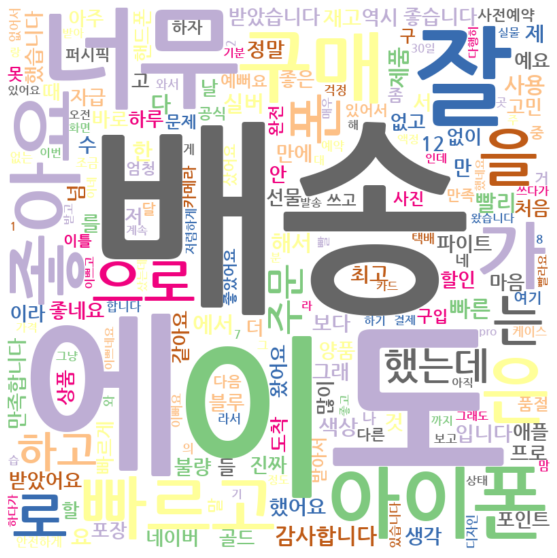

In [24]:
# ÎßéÏù¥ ÎÇòÏò® Îã®Ïñ¥Î°ú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
c = WordCloud(font_path = 'C:\\windows\\Fonts\\NanumGothicBold.ttf', # Í∏ÄÏî®Ï≤¥
               background_color='white', # Î∞∞Í≤ΩÏÉâ
               colormap = 'Accent_r',
               width = 800,
               height = 800)

wordcloud_words = wc.generate_from_frequencies(frequency) # ÏïûÏÑú Î∂ÑÏÑùÌïú Îã®Ïñ¥ ÎπàÎèÑÏàòÎ°ú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
array = wc.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10)) # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Í∑∏Î¶¨Í∏∞
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('iphone_total_worldcloud.png')